C:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for K-Means Clustering: 0.5377578841092405
Silhouette Score for Hierarchical Clustering: 0.45848203332715876

K-Means Cluster Profiles:
                Gross Domestic Product (GDP)  \
KMeans_Cluster                                 
0                                  -0.756724   
1                                   0.973093   
2                                   1.119524   

                Gross National Income(GNI) in USD  Trade Balance  \
KMeans_Cluster                                                     
0                                       -0.755514       0.177807   
1                                        0.978860      -0.966107   
2                                        1.099879       1.534557   

                Sectoral Output  
KMeans_Cluster                   
0                     -0.754260  
1                      0.967455  
2                      1.121897  

Hierarchical Cluster Profiles:
                      Gross Domestic Product (GDP)  \
Hierarchi

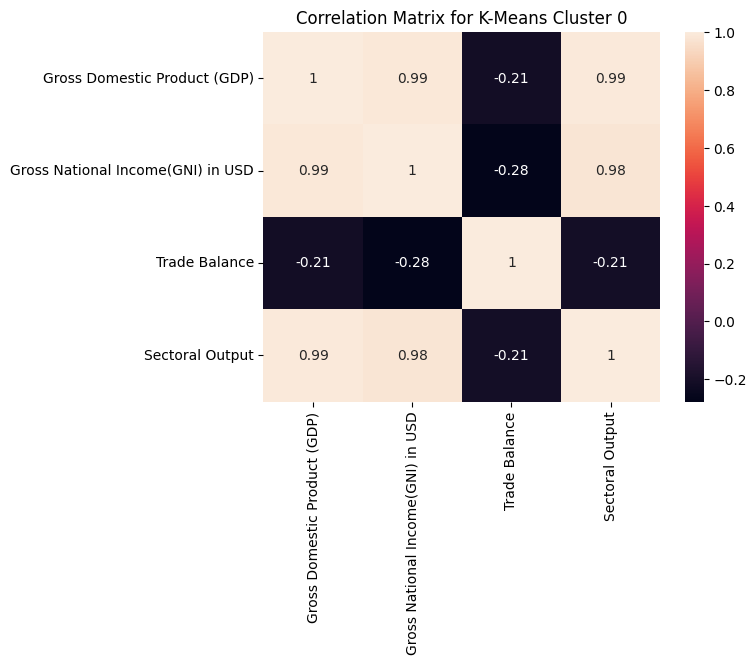

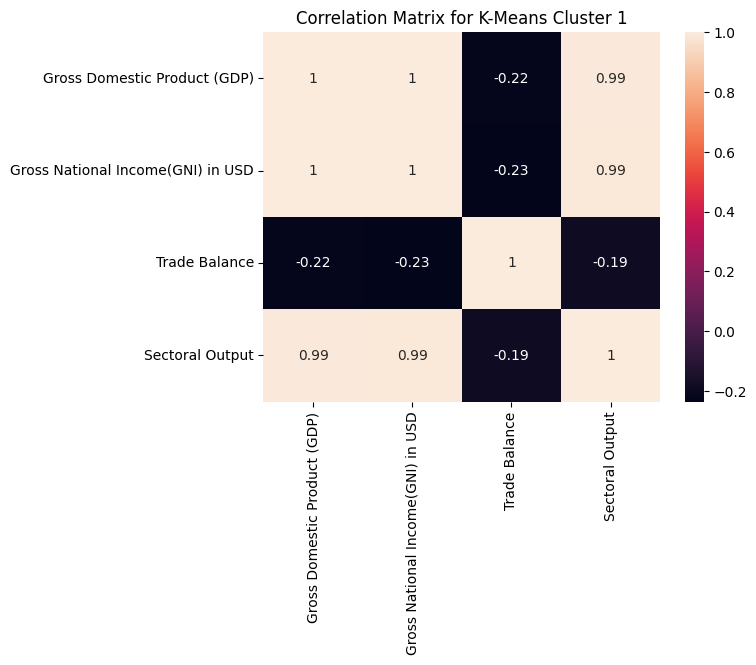

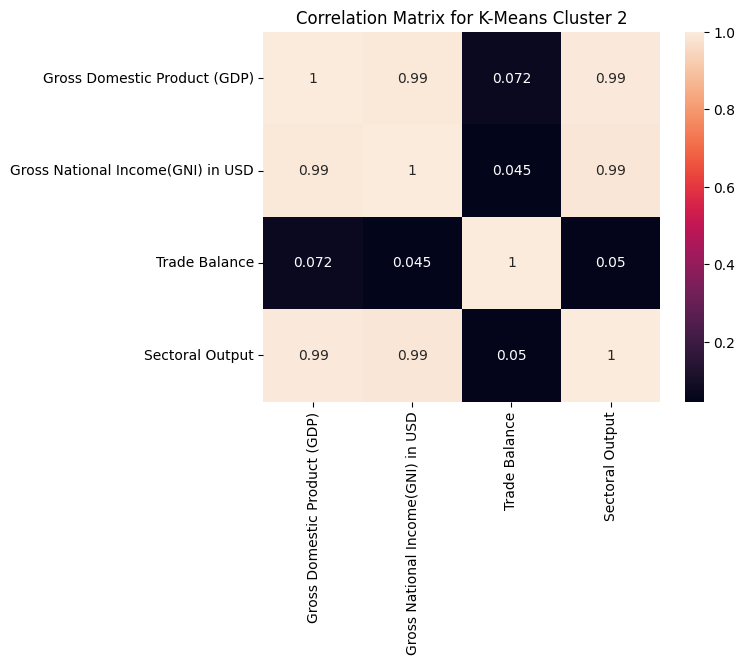

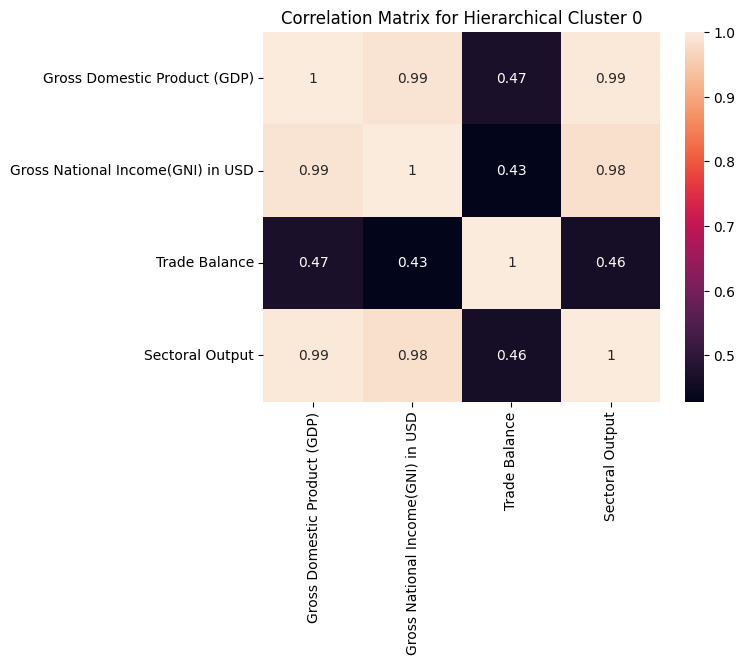

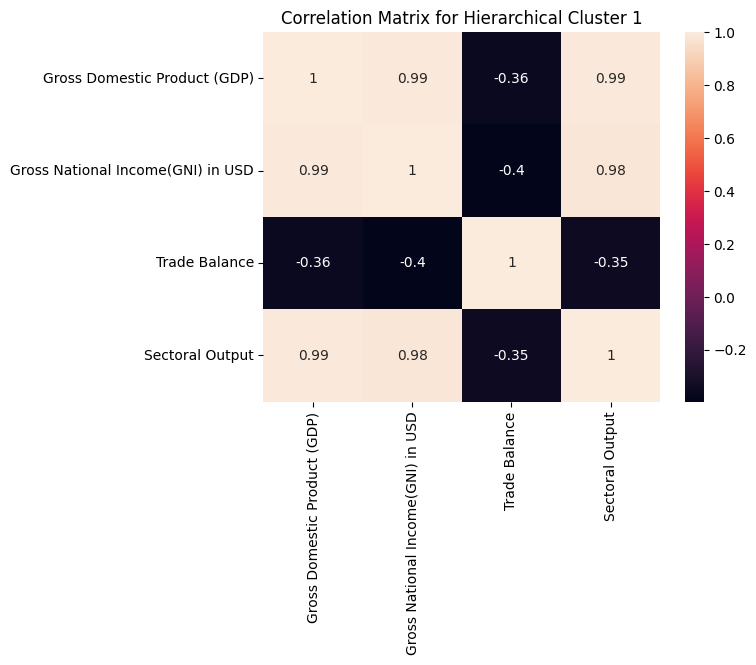

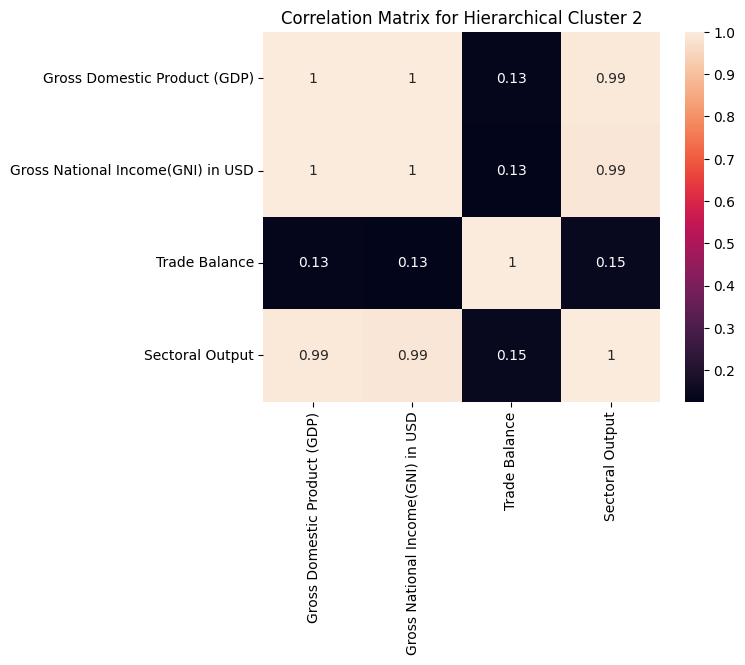

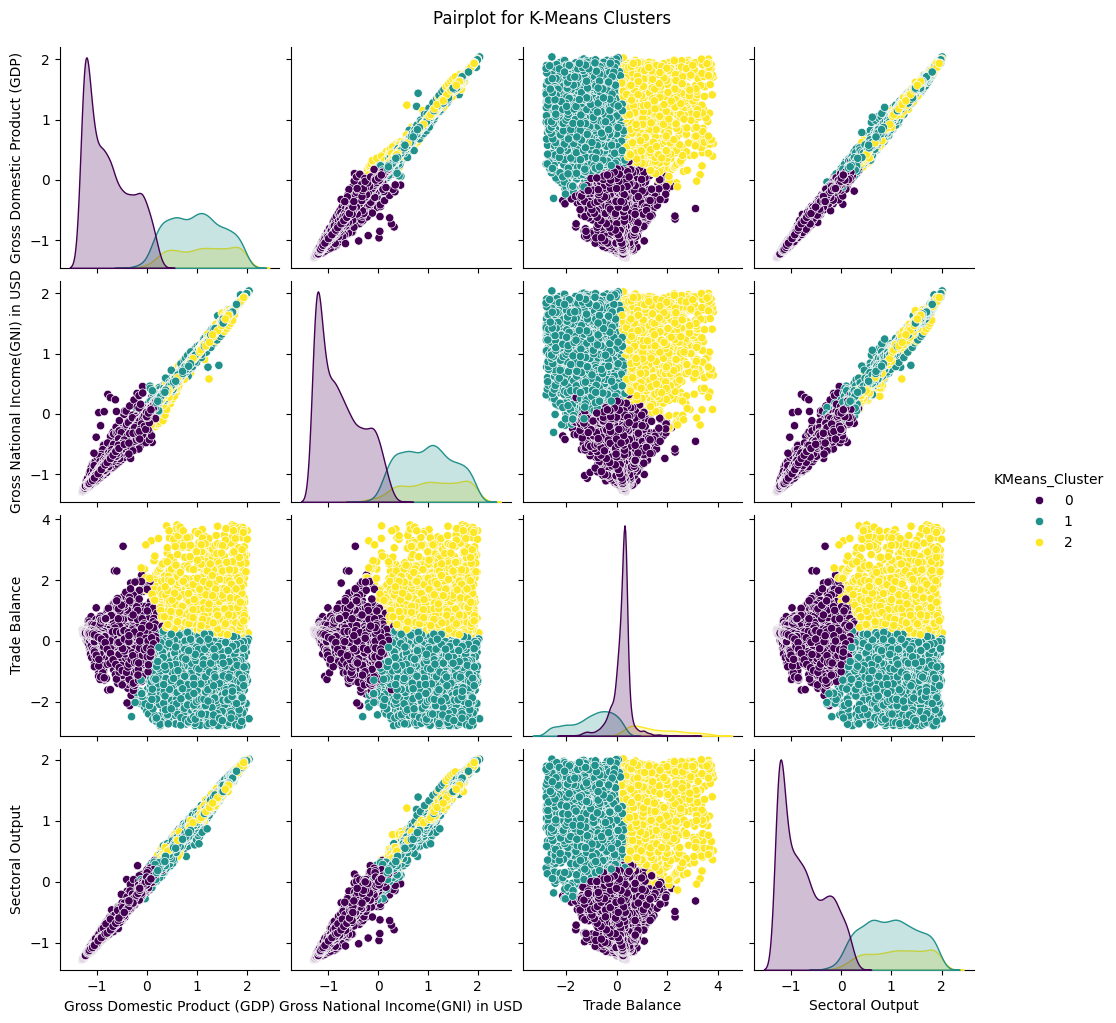

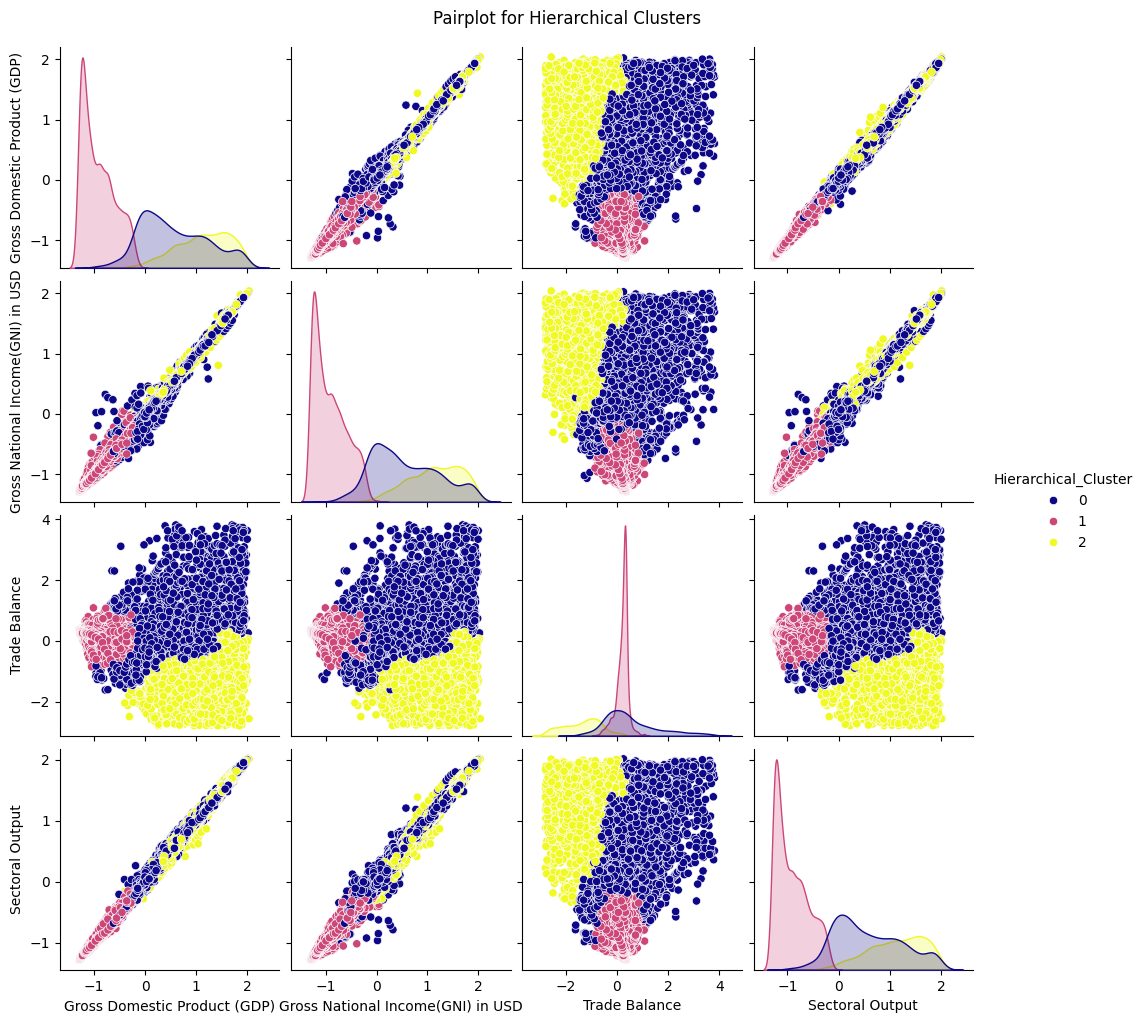

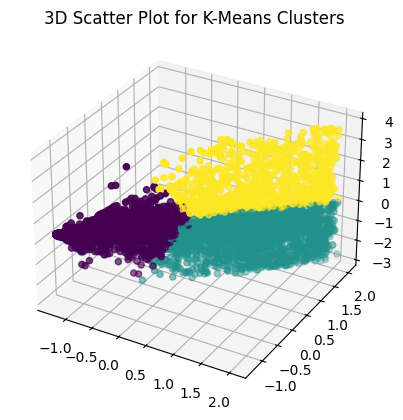

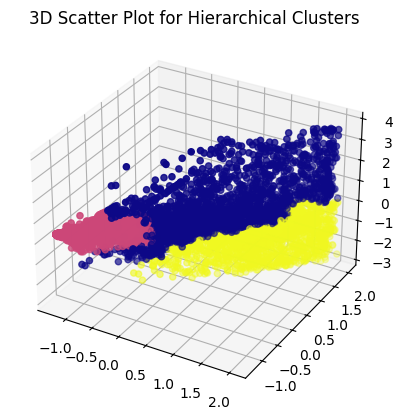

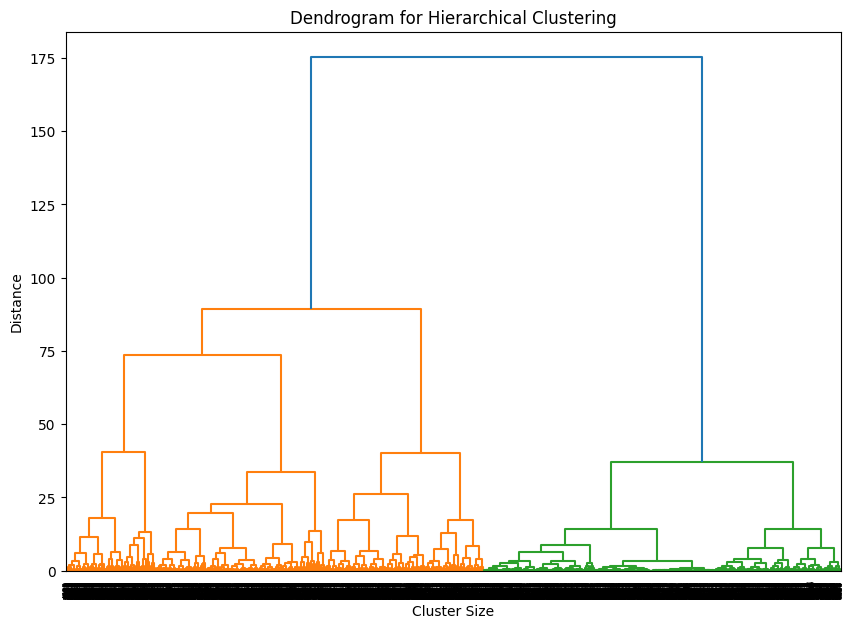

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

# Load your dataset
data = pd.read_csv(r'C:\Users\asus\Desktop\Assignment\Second Assignment\Preprocessed1.csv')

# Define the columns of interest for clustering
columns_of_interest = ['Gross Domestic Product (GDP)', 'Gross National Income(GNI) in USD', 'Trade Balance', 'Sectoral Output']

# Extract the data for clustering
data_for_clustering = data[columns_of_interest]

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Define the number of clusters
num_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

# Apply Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
data['Hierarchical_Cluster'] = hierarchical.fit_predict(data_scaled)

# Silhouette score for K-Means clustering
kmeans_silhouette = silhouette_score(data_scaled, data['KMeans_Cluster'])
print(f"Silhouette Score for K-Means Clustering: {kmeans_silhouette}")

# Silhouette score for Hierarchical clustering
hierarchical_silhouette = silhouette_score(data_scaled, data['Hierarchical_Cluster'])
print(f"Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette}")

# Calculate descriptive statistics for each cluster to profile clusters
kmeans_profile = data.groupby('KMeans_Cluster')[columns_of_interest].mean()
hierarchical_profile = data.groupby('Hierarchical_Cluster')[columns_of_interest].mean()

print("\nK-Means Cluster Profiles:")
print(kmeans_profile)

print("\nHierarchical Cluster Profiles:")
print(hierarchical_profile)


# Calculate descriptive statistics for each cluster
for i in range(num_clusters):
    print(f"\nDescriptive Statistics for K-Means Cluster {i}:")
    print(data[data['KMeans_Cluster'] == i][columns_of_interest].describe())
    
    print(f"\nDescriptive Statistics for Hierarchical Cluster {i}:")
    print(data[data['Hierarchical_Cluster'] == i][columns_of_interest].describe())

# Calculate and display correlation matrices within each K-Means cluster
for i in range(num_clusters):
    cluster_data = data[data['KMeans_Cluster'] == i][columns_of_interest]
    correlation_matrix = cluster_data.corr()
    sns.heatmap(correlation_matrix, annot=True)
    plt.title(f'Correlation Matrix for K-Means Cluster {i}')
    plt.show()

# Calculate and display correlation matrices within each K-Means cluster
for i in range(num_clusters):
    cluster_data = data[data['Hierarchical_Cluster'] == i][columns_of_interest]
    correlation_matrix = cluster_data.corr()
    sns.heatmap(correlation_matrix, annot=True)
    plt.title(f'Correlation Matrix for Hierarchical Cluster {i}')
    plt.show()

# Convert all columns to numeric if possible
data = data.apply(pd.to_numeric, errors='ignore')
# Save the data with cluster labels
data.to_csv(r'C:\Users\asus\Desktop\Assignment\Second Assignment\Preprocessed_with_clusters.csv', index=False)

# Visualization
# Pairplot for K-Means clusters
sns.pairplot(data, vars=columns_of_interest, hue='KMeans_Cluster', palette='viridis')
plt.suptitle('Pairplot for K-Means Clusters', y=1.02)  # y=1.02 lifts the title a bit
plt.show()

# Pairplot for Hierarchical clusters
sns.pairplot(data, vars=columns_of_interest, hue='Hierarchical_Cluster', palette='plasma')
plt.suptitle('Pairplot for Hierarchical Clusters', y=1.02)
plt.show()

# 3D scatter plot for K-Means clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[columns_of_interest[0]], data[columns_of_interest[1]], data[columns_of_interest[2]], 
           c=data['KMeans_Cluster'], cmap='viridis')
ax.set_title('3D Scatter Plot for K-Means Clusters')
plt.show()

# 3D scatter plot for Hierarchical clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[columns_of_interest[0]], data[columns_of_interest[1]], data[columns_of_interest[2]], 
           c=data['Hierarchical_Cluster'], cmap='plasma')
ax.set_title('3D Scatter Plot for Hierarchical Clusters')
plt.show()

# Generating the linkage matrix for dendrogram
linked = linkage(data_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=data.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

